### Step 1: I want to load my medical reports dataset and view the first few rows


In [7]:
import pandas as pd

# Load dataset

df = pd.read_csv('../data/medical_reports.csv')

# Preview
df.head()
df.info()
df.shape
df.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   report_text   200 non-null    object
 1   diabetes      200 non-null    int64 
 2   hypertension  200 non-null    int64 
 3   pneumonia     200 non-null    int64 
 4   asthma        200 non-null    int64 
 5   arthritis     200 non-null    int64 
dtypes: int64(5), object(1)
memory usage: 9.5+ KB


Index(['report_text', 'diabetes', 'hypertension', 'pneumonia', 'asthma',
       'arthritis'],
      dtype='object')

### Step 2: I want to check if there are any missing values or data type issues


In [10]:
df.info()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   report_text   200 non-null    object
 1   diabetes      200 non-null    int64 
 2   hypertension  200 non-null    int64 
 3   pneumonia     200 non-null    int64 
 4   asthma        200 non-null    int64 
 5   arthritis     200 non-null    int64 
dtypes: int64(5), object(1)
memory usage: 9.5+ KB


report_text     0
diabetes        0
hypertension    0
pneumonia       0
asthma          0
arthritis       0
dtype: int64

### Step 3: I want to see how common each disease is in my dataset


In [11]:
df.iloc[:, 1:].sum().sort_values(ascending=False)


arthritis       112
pneumonia       111
hypertension    111
asthma          109
diabetes         92
dtype: int64

### Step 4: I want to understand how long my medical reports are


In [12]:
df['report_text'].apply(len).describe()


count    200.000000
mean      43.995000
std        2.692811
min       40.000000
25%       42.000000
50%       44.000000
75%       46.000000
max       49.000000
Name: report_text, dtype: float64

### Step 5: I want to read a few random reports to get a feel for the writing


In [13]:
df.sample(3)


,report_text,diabetes,hypertension,pneumonia,asthma,arthritis
174,Reports wheezing and difficulty breathing.,0,0,1,1,1
72,Experiencing joint pain and inflammation.,1,1,1,0,0
171,Frequent coughing and low oxygen levels.,0,0,0,0,1


### Step 6: Visualize Label Distribution (with matplotlib)

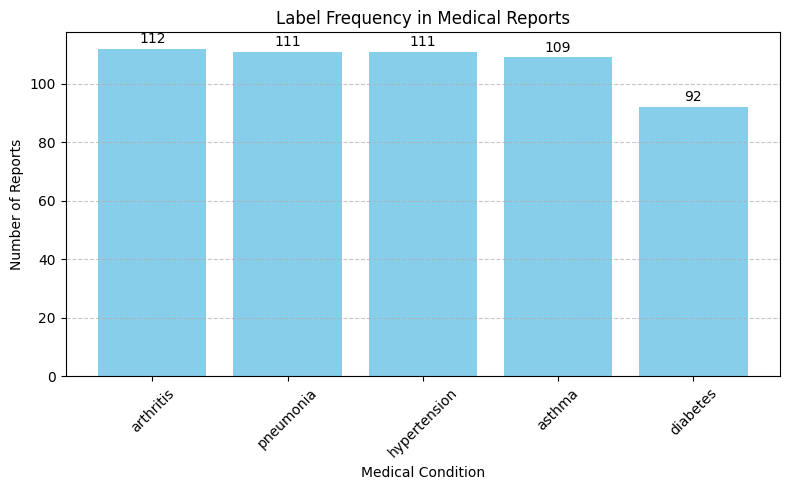

In [14]:
# Step 6: Visualize label distribution

import matplotlib.pyplot as plt

label_counts = df.iloc[:, 1:].sum().sort_values(ascending=False)

plt.figure(figsize=(8, 5))
bars = plt.bar(label_counts.index, label_counts.values, color='skyblue')
plt.title('Label Frequency in Medical Reports')
plt.xlabel('Medical Condition')
plt.ylabel('Number of Reports')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add value labels on bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 1, int(yval), ha='center', va='bottom')

plt.tight_layout()
plt.show()
